In [79]:
import os
import random
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import date, timedelta

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Range of latitudes and longitudes
range_of_latitude = (-90, 90)
range_of_longitude = (-180, 180)

output_path = os.path.join('..','Outputs')
images_path = os.path.join('..','Outputs', 'Images')

# The weather data was acquired on 02/01/20
# To assure accuracy, Change this number to match the exact date of data retrieval
day_since_data_request = 1

In [80]:
weather_df = pd.read_csv(output_path + '/weather_df.csv')
weather_df.head()

,City,Country,Country Code,Date,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,Tonga,TO,1580600753,-21.20,-175.20,84.20,70.0,40.0,8.05
1,Grindavik,Iceland,IS,1580600944,63.84,-22.43,28.40,86.0,75.0,10.29
2,Bermejo,"Bolivia, Plurinational State of",AR,1580600945,-32.88,-68.80,95.00,21.0,40.0,4.70
3,Tocopilla,Chile,CL,1580600945,-22.09,-70.20,60.04,57.0,3.0,3.00
4,Arraial Do Cabo,Brazil,BR,1580600865,-22.97,-42.03,80.11,85.0,88.0,10.36


In [238]:
def annotate_equator_and_poles(axes_handle):
    
    # Get y-limts of the plot to draw lines and annotations
    ylims = axes_handle.get_ylim()
    
    # Equator
    axes_handle.plot([0,0],[ylims[0], ylims[1]],color = 'firebrick')
    axes_handle.annotate('Equator', (-8, ylims[0]), fontsize = 14, color = 'firebrick', rotation = 90)
    # North Pole
    axes_handle.plot([90,90],[ylims[0], ylims[1]], color = 'lightskyblue')
    axes_handle.annotate('North Pole', (84, ylims[0]), fontsize = 14, color = 'lightskyblue', rotation = 90)
    # South Pole
    axes_handle.plot([-90,-90],[ylims[0], ylims[1]], color = 'lightskyblue')
    axes_handle.annotate('South Pole', (-96, ylims[0]), fontsize = 14, color = 'lightskyblue', rotation = 90)
    
    return axes_handle

In [239]:
def plot_weather_data_vs_latitude(x_values, y_values, y_label):
    # Set-up figure
    fig1, ax1 = plt.subplots(figsize=(8,6))
    
    ax1.set_xlabel('Latitude', fontsize = 14)
    ax1.set_ylabel(f'{y_label}', fontsize = 14);
    colors = y_values;
    ax1.scatter(x_values, y_values, alpha = 0.3, c = colors);

    ax1.set_xlim([-100,100]);
    xticks_values = [_ for _ in range(-105,105,15)];
    ax1.set_xticks(xticks_values[1:len(xticks_values)]);
    
    ax1.tick_params(axis='both', which='major', labelsize=12)

    return fig1, ax1

In [240]:
def calc_plot_linregress(x_values, y_values, axes_handle):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    axes_handle.plot(x_values,regress_values, color = 'black', alpha = 0.3, linewidth = 3)
    axes_handle.annotate(line_eq,(x_values[int(len(x_values)/3)], \
                                  regress_values[int(len(regress_values)/2)]), \
                         fontsize = 16, color="black")

In [241]:
def plot_weather_data_in_hemispheres(southern_x_values, \
                                     southern_y_values, \
                                     northern_x_values, \
                                     northern_y_values, \
                                     y_label):
    
    # Set-up figure with 2 subplots side-by-side
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14,6))
    
    for an_axis in axes:
        an_axis.set_xlabel('Latitude', fontsize = 14)
        an_axis.set_ylabel(f'{y_label}', fontsize = 14);
        
        if an_axis == axes[1]:
            an_axis.set_xlim([-15,100]);
            xticks_values = [_ for _ in range(0,105,15)];
            an_axis.set_xticks(xticks_values[0:len(xticks_values)]);
        
        elif an_axis == axes[0]:
            an_axis.set_xlim([-100, 10]);
            xticks_values = [_ for _ in range(-90,15,15)];
            an_axis.set_xticks(xticks_values[0:len(xticks_values)]);

        an_axis.tick_params(axis='both', which='major', labelsize=12)
    
    # Scatter plots
    colors = southern_y_values;
    axes[0].scatter(southern_x_values, southern_y_values, color = 'salmon', alpha = 0.3);
    calc_plot_linregress(southern_x_values, southern_y_values, axes[0])
    
    colors = northern_y_values;
    axes[1].scatter(northern_x_values, northern_y_values, color = 'salmon', alpha = 0.3);
    calc_plot_linregress(northern_x_values, northern_y_values, axes[1])
    
    axes[0].set_title('(a) Southern Hemisphere', fontsize = 14)
    axes[1].set_title('(b) Northern Hemisphere', fontsize = 14)
    
    
    
    return fig, axes

### Latitude vs Temperature

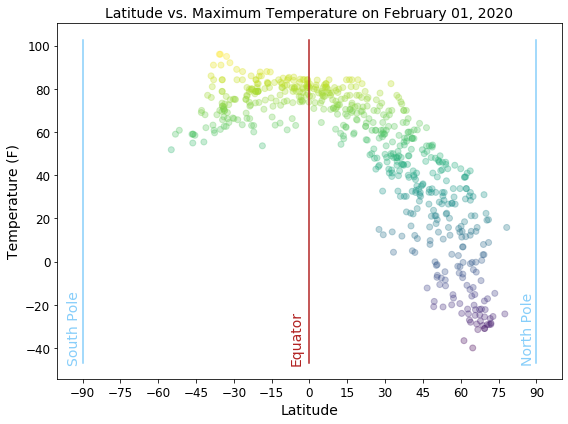

In [242]:
fig1, ax1 = plot_weather_data_vs_latitude(weather_df['Latitude'], \
                                          weather_df['Max Temp'], \
                                          'Temperature (F)');
ax1.set_title('Latitude vs. Maximum Temperature on ' + \
              (date.today() - timedelta(days=day_since_data_request)).strftime('%B %d, %Y'), \
              fontsize = 14);
fig1.tight_layout()

annotate_equator_and_poles(ax1)
plt.show()

### Latitude vs Humidity

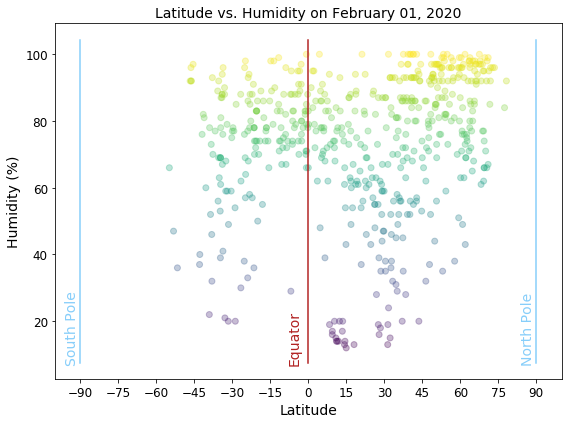

In [243]:
fig1, ax1 = plot_weather_data_vs_latitude(weather_df['Latitude'], \
                                          weather_df['Humidity'], \
                                          'Humidity (%)');
ax1.set_title('Latitude vs. Humidity on ' + \
              (date.today() - timedelta(days=day_since_data_request)).strftime('%B %d, %Y'), \
              fontsize = 14);
fig1.tight_layout()
annotate_equator_and_poles(ax1)
plt.show()

### Latitude vs. Cloudiness

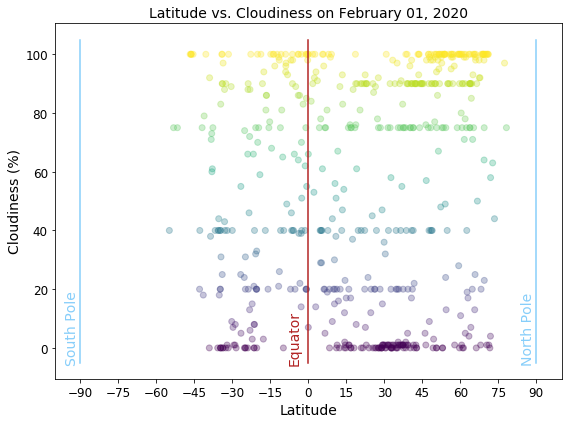

In [244]:
fig1, ax1 = plot_weather_data_vs_latitude(weather_df['Latitude'], \
                                          weather_df['Cloudiness'], \
                                          'Cloudiness (%)');
ax1.set_title('Latitude vs. Cloudiness on ' + \
              (date.today() - timedelta(days=day_since_data_request)).strftime('%B %d, %Y'), \
              fontsize = 14);
fig1.tight_layout()
annotate_equator_and_poles(ax1)
plt.show()

### Latitude vs. Wind Speed

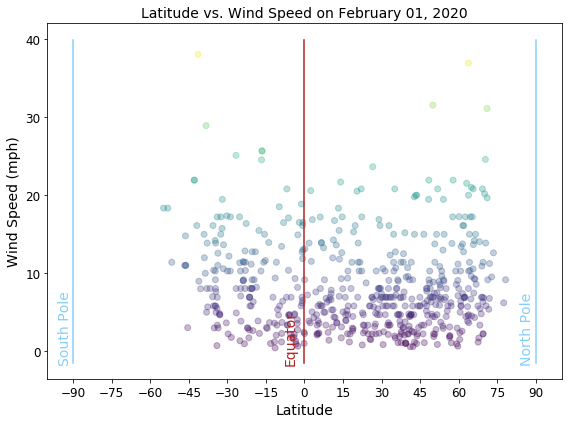

In [245]:
fig1, ax1 = plot_weather_data_vs_latitude(weather_df['Latitude'],\
                                          weather_df['Wind Speed'],\
                                          'Wind Speed (mph)');
ax1.set_title('Latitude vs. Wind Speed on ' + \
              (date.today() - timedelta(days=day_since_data_request)).strftime('%B %d, %Y'), \
              fontsize = 14);
fig1.tight_layout()
annotate_equator_and_poles(ax1)
plt.show()

In [246]:
# Slice data for Northern/Southern Hemispheres
northern_hemisphere_df = weather_df[weather_df['Latitude'] >= 0]
southern_hemisphere_df = weather_df[weather_df['Latitude'] < 0]

### Max Temperature vs. Latitude - Linear Regression

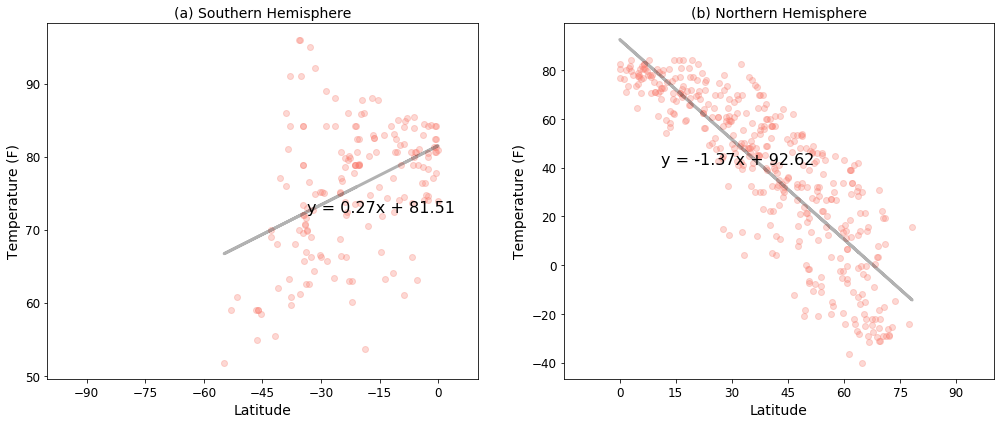

In [247]:
fig, axes = plot_weather_data_in_hemispheres(southern_hemisphere_df['Latitude'], \
                                            southern_hemisphere_df['Max Temp'], \
                                            northern_hemisphere_df['Latitude'], \
                                            northern_hemisphere_df['Max Temp'], \
                                            'Temperature (F)');
fig.tight_layout()
plt.subplots_adjust(wspace = 0.2)
plt.show()

### Humidity (%) vs. Latitude - Linear Regression

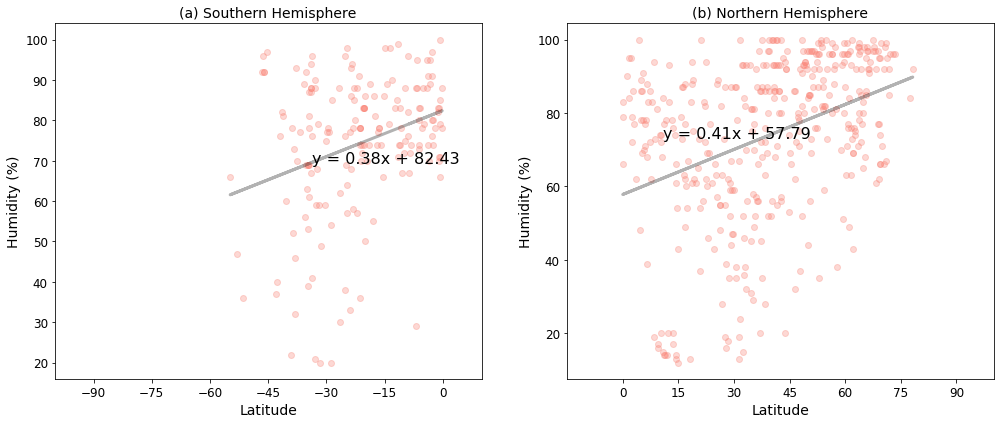

In [248]:
fig, axes = plot_weather_data_in_hemispheres(southern_hemisphere_df['Latitude'], \
                                            southern_hemisphere_df['Humidity'], \
                                            northern_hemisphere_df['Latitude'], \
                                            northern_hemisphere_df['Humidity'], \
                                            'Humidity (%)');
fig.tight_layout()
plt.subplots_adjust(wspace = 0.2)
plt.show()

### Cloudiness (%) vs. Latitude - Linear Regression

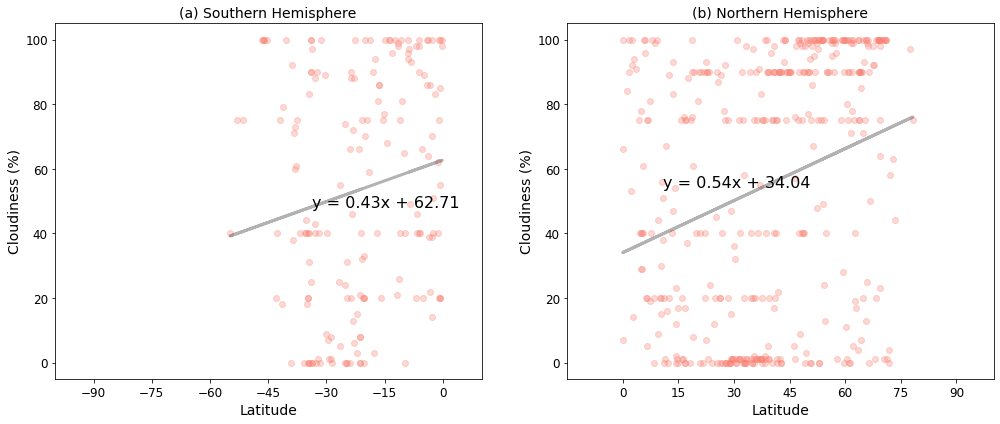

In [249]:
fig, axes = plot_weather_data_in_hemispheres(southern_hemisphere_df['Latitude'], \
                                            southern_hemisphere_df['Cloudiness'], \
                                            northern_hemisphere_df['Latitude'], \
                                            northern_hemisphere_df['Cloudiness'], \
                                            'Cloudiness (%)');
fig.tight_layout()
plt.subplots_adjust(wspace = 0.2)
plt.show()

### Wind Speed vs. Latitude

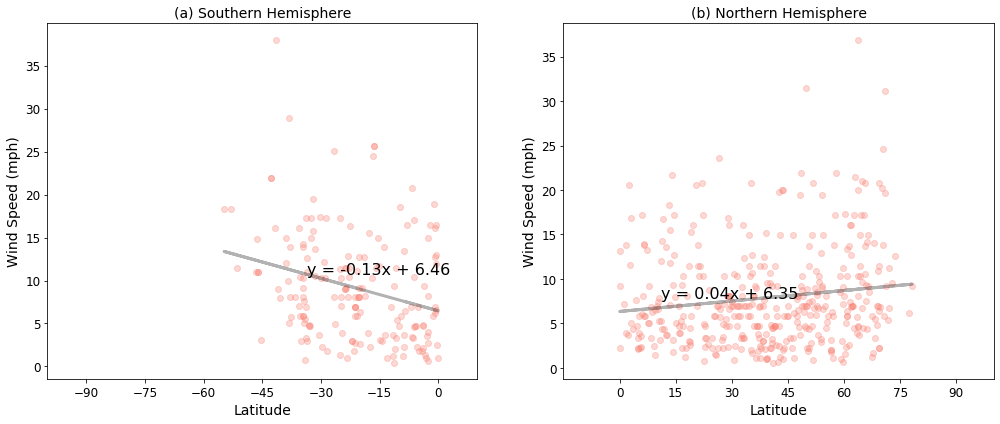

In [250]:
fig, axes = plot_weather_data_in_hemispheres(southern_hemisphere_df['Latitude'], \
                                            southern_hemisphere_df['Wind Speed'], \
                                            northern_hemisphere_df['Latitude'], \
                                            northern_hemisphere_df['Wind Speed'], \
                                            'Wind Speed (mph)');
fig.tight_layout()
plt.subplots_adjust(wspace = 0.2)
plt.show()